# 1. Data Cleaning


### 1.1 Importing the libraries

In [5]:
import numpy as np
import pandas as pd

### 1.2 Importing datasets

In [6]:
dataset = pd.read_csv('./spam.csv', encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 1.3 Data cleaning

#### Delete last 3 cloumn

In [7]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
dataset.sample(5)

,v1,v2
2303,ham,Should I tell my friend not to come round til ...
3545,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...
3749,ham,"Buzz! Hey, my Love ! I think of you and hope y..."
3984,ham,"Whatever, juliana. Do whatever you want."
3948,ham,HMM yeah if your not too grooved out! And im l...


#### Rename column

In [8]:
dataset.rename(columns={'v1':'Output','v2':'Text'},inplace=True)
dataset.sample(5)

,Output,Text
2349,ham,Yar else i'll thk of all sorts of funny things.
3944,ham,I will be gentle princess! We will make sweet ...
3465,ham,"Actually fuck that, just do whatever, do find ..."
4909,ham,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."


### 1.4 Encoding categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset['Output']=lb.fit_transform(dataset['Output'])
dataset.head()


,Output,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 1.5 Take care for Missing &&  Duplicate data


#### Checking missing data


In [28]:
dataset.isnull().sum()

Output              0
Text                0
num_characters      0
num_words           0
num_sentance        0
Transformed_Text    0
dtype: int64

#### Checking duplicatedata

In [30]:
dataset.duplicated().sum()

0

#### Removing Duplicate


In [31]:
dataset=dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

0

# 2. EDA

#### 2.1 Checking cartegory distribution

In [13]:
dataset['Output'].value_counts()


Output
0    4516
1     653
Name: count, dtype: int64

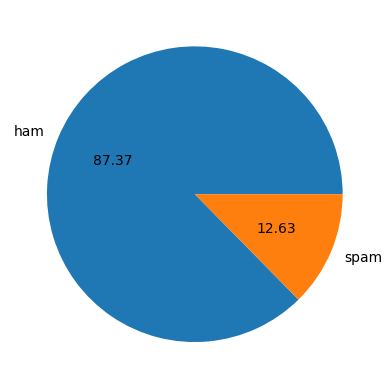

In [14]:
import matplotlib.pyplot as plt
plt.pie(dataset['Output'].value_counts(),labels=['ham','spam'], autopct="%0.2f")
plt.show()

#### 2.2 Checking data imbalance

count number of characters

In [15]:
import nltk

count number of words in each text

In [16]:
dataset['num_characters']=dataset['Text'].apply(len)
dataset.head()

,Output,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
dataset['num_words']=dataset['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.head()

,Output,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


count number of sentences in each text

In [18]:
dataset['num_sentance']=dataset['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset.head()

,Output,Text,num_characters,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


overall description of sapm and ham sms

In [19]:
dataset[['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


overall description of sapm 

In [20]:
#Spam
dataset[dataset['Output']==1][['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Overall description of ham messages

In [21]:
#Ham
dataset[dataset['Output']==0][['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: >

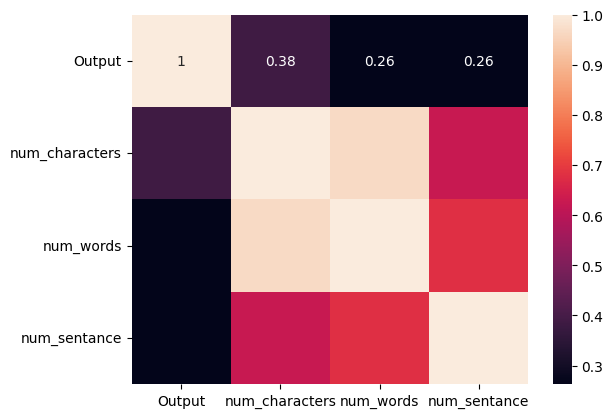

In [22]:
import seaborn as sb
numeric_dataset = dataset.select_dtypes(include='number')
sb.heatmap(numeric_dataset.corr(),annot=True)

# 3. Data Preprocessing
        1.Lower case
        2.Tokenization
        3.Removing special characters
        4.Removing stop words
        5.stemming

In [23]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

def Transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [24]:
dataset['Transformed_Text']=dataset['Text'].apply(Transform_text)
dataset.head()

,Output,Text,num_characters,num_words,num_sentance,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### 3.1 formation of wordcloud


In [25]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

<Figure size 1500x800 with 0 Axes>

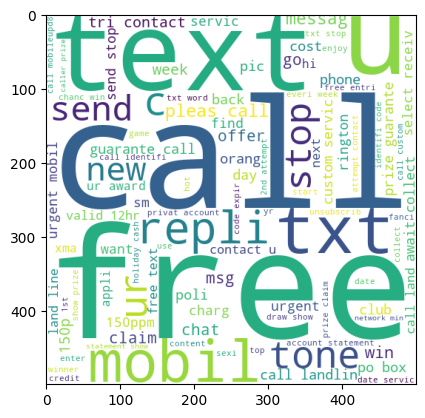

<Figure size 1500x800 with 0 Axes>

In [26]:
spam_wc = wc.generate(dataset[dataset['Output'] == 1]['Transformed_Text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

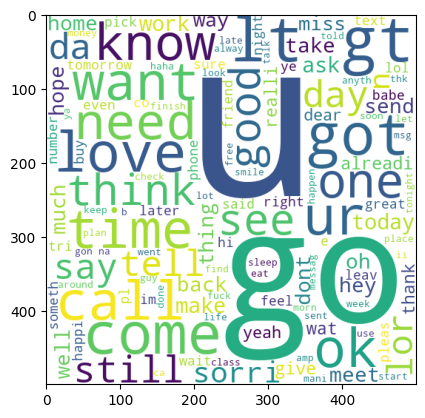

<Figure size 1500x800 with 0 Axes>

In [27]:
ham_wc = wc.generate(dataset[dataset['Output'] == 0]['Transformed_Text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.figure(figsize=(15,8))

# 4. Model building